<a href="https://colab.research.google.com/github/ll3091/ANLY-580-01-NLP-Project/blob/master/ModelEvaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NLP Project: Model Evaluation

In [1]:
# connect to Google Drive
from google.colab import drive

drive.mount('/content/gdrive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive/


In [2]:
# move to results folder
% cd ./gdrive/'My Drive'/NLPProject/ModelTrainingOutput

/content/gdrive/My Drive/NLPProject/ModelTrainingOutput


In [0]:
# import packages
import json
import os
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
!ls

LongText  MediumText  ShortText


## Short Texts

In [0]:
# collect file names
folder = './ShortText/'
files = os.listdir(folder)

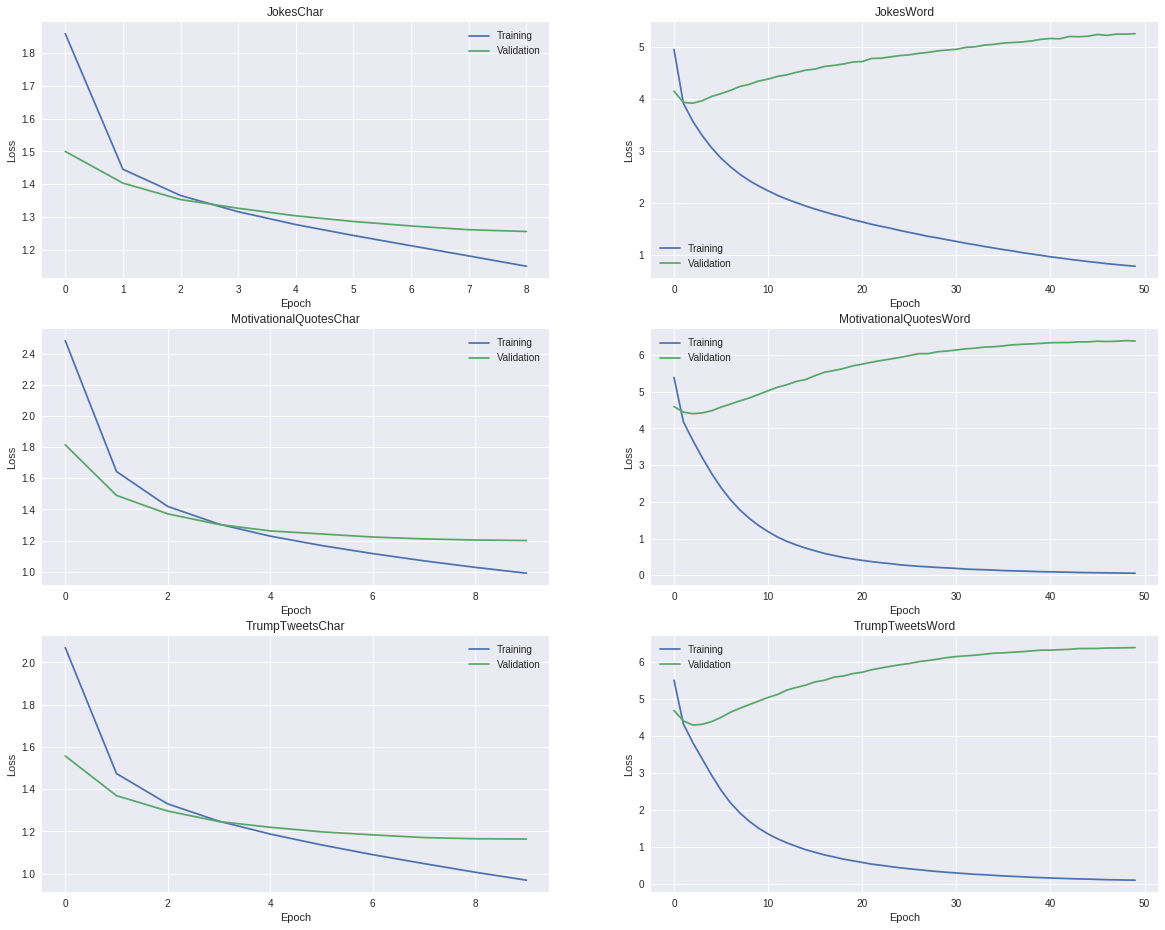

In [0]:
# extract and plot model loss
plt.figure(figsize=(20, 16))
ind = 1
for f in sorted(files):
  loss = []
  val_loss = []
  with open(folder+f, 'r', encoding = 'utf-8') as inputTxt:
    lines = inputTxt.readlines()
    for l in lines:
      if len(l)>30:
        if '==============================' in l:
          losses = re.findall("\d+\.\d+", l)
          if len(losses)==2:
            loss.append(float(losses[0]))
            val_loss.append(float(losses[1]))
  plt.subplot(len(files)/2, 2, ind) 
  plt.plot(loss, label = 'Training')
  plt.plot(val_loss, label = 'Validation')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.title(f.replace('.txt', ''))
  plt.legend()
  ind +=1
plt.show()          

## Medium Texts

In [0]:
# collect file names
folder = './MediumText/'

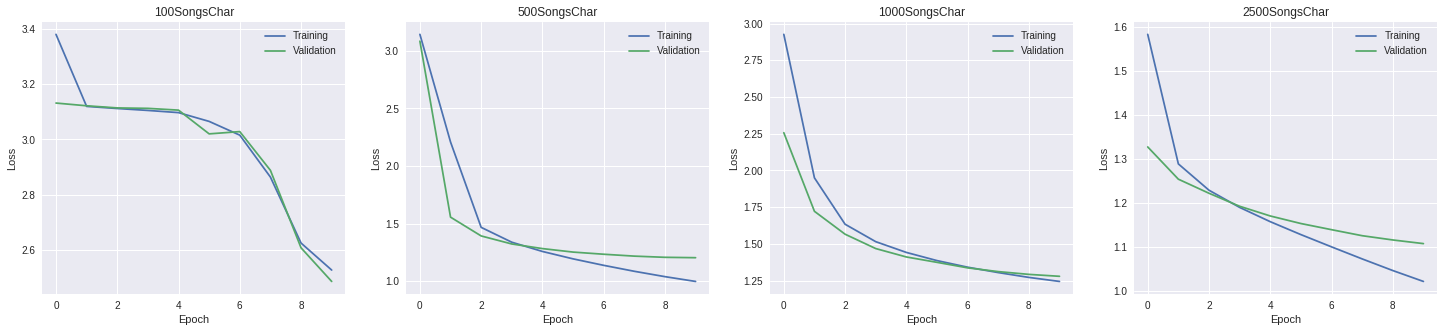

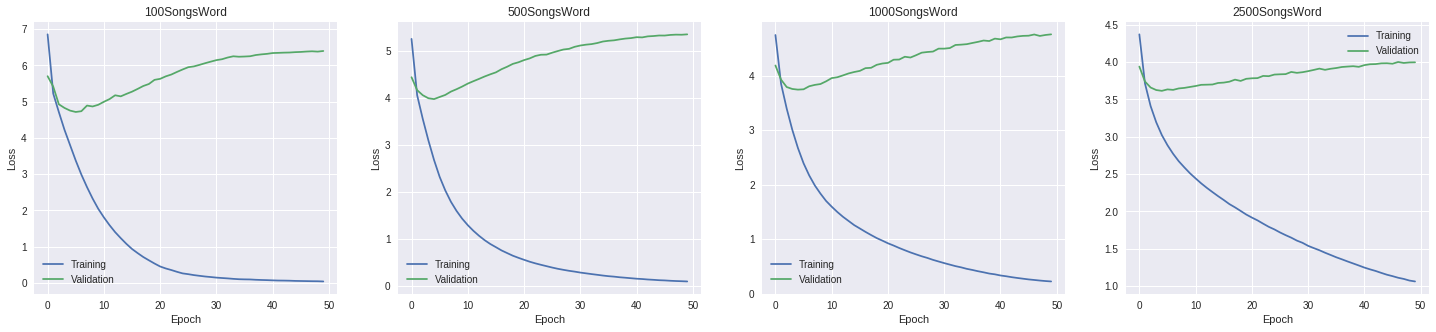

In [0]:
# extract and plot model loss
for f in sorted(['SongsChar.txt', 'SongsWord.txt']):
  plt.figure(figsize=(25, 5))
  ind = 1
  with open(folder+f, 'r', encoding = 'utf-8') as inputTxt:
    mods = inputTxt.read().split('Training with ')
    mods = [m.split('\n') for m in mods if len(m)>0]
    for lines in mods:
      n = lines[0].split()[0]
      loss = []
      val_loss = []
      for l in lines:
        if len(l)>30:
          if '==============================' in l:
            losses = re.findall("\d+\.\d+", l)
            if len(losses)==2:
              loss.append(float(losses[0]))
              val_loss.append(float(losses[1]))
      plt.subplot(1, len(mods), ind) 
      plt.plot(loss, label = 'Training')
      plt.plot(val_loss, label = 'Validation')
      plt.ylabel('Loss')
      plt.xlabel('Epoch')
      plt.title(str(n)+f.replace('.txt', ''))
      plt.legend()
      ind +=1
    plt.show()          

In [0]:
# collect file names
files = ['RecipesChar.txt', 'RecipesWord.txt']

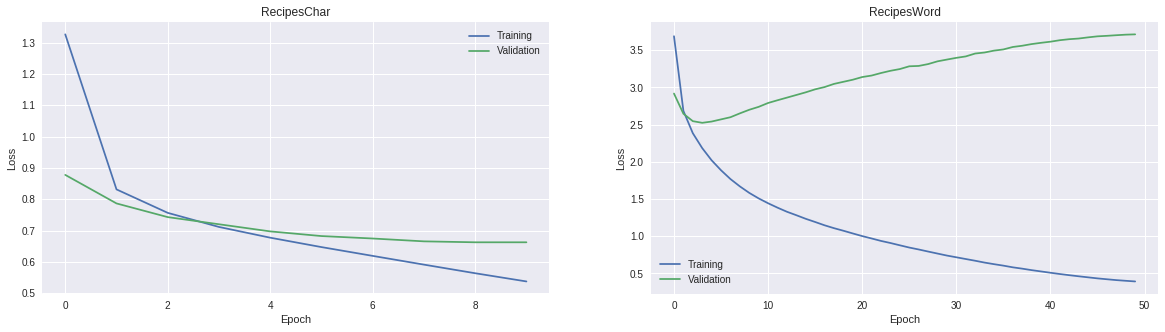

In [0]:
# extract and plot model loss
plt.figure(figsize=(20, 5))
ind = 1
for f in sorted(files):
  loss = []
  val_loss = []
  with open(folder+f, 'r', encoding = 'utf-8') as inputTxt:
    lines = inputTxt.readlines()
    for l in lines:
      if len(l)>30:
        if '==============================' in l:
          losses = re.findall("\d+\.\d+", l)
          if len(losses)==2:
            loss.append(float(losses[0]))
            val_loss.append(float(losses[1]))
  plt.subplot(len(files)/2, 2, ind) 
  plt.plot(loss, label = 'Training')
  plt.plot(val_loss, label = 'Validation')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.title(f.replace('.txt', ''))
  plt.legend()
  ind +=1
plt.show()          

## Long Texts

In [0]:
# collect file names
folder = './LongText/'
files = os.listdir(folder)

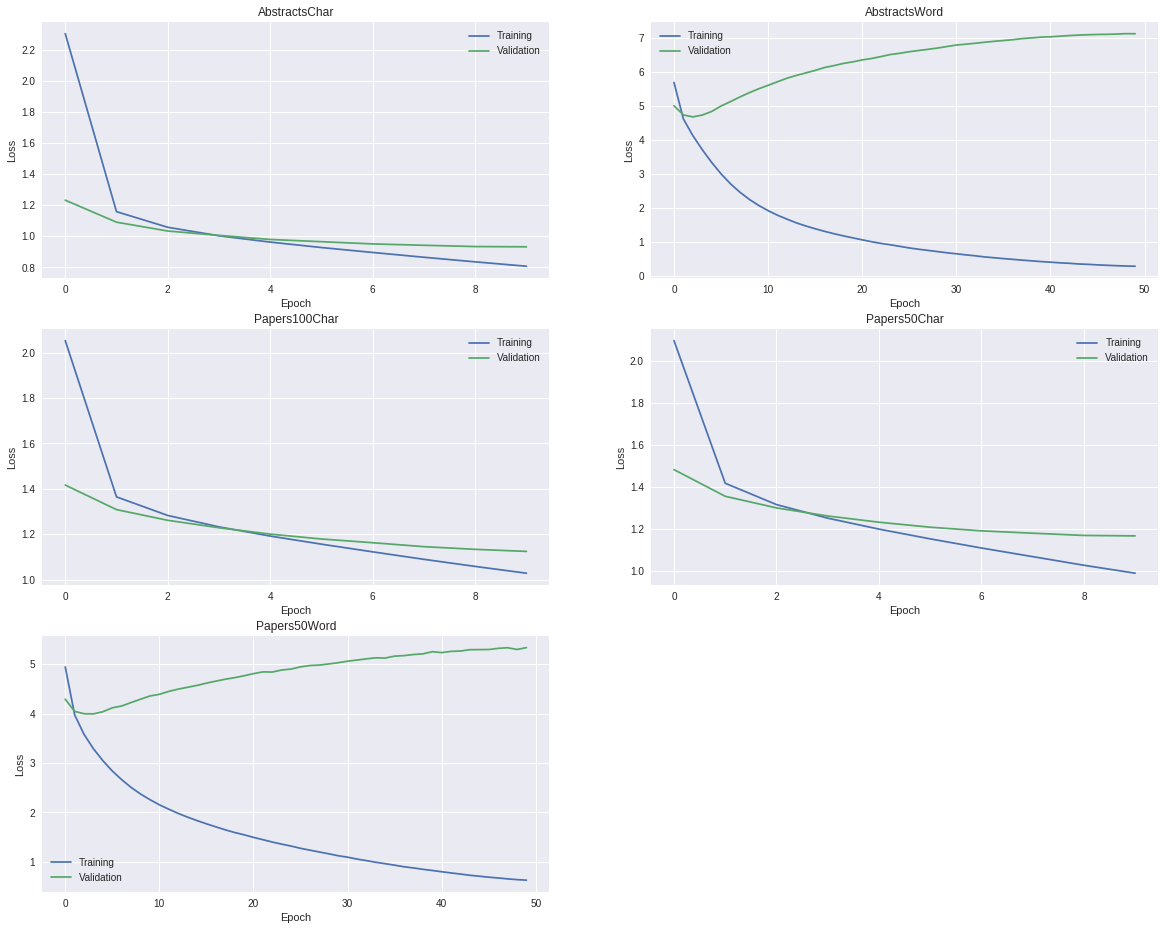

In [8]:
# extract and plot model loss
plt.figure(figsize=(20, 16))
ind = 1
for f in sorted(files):
  loss = []
  val_loss = []
  with open(folder+f, 'r', encoding = 'utf-8') as inputTxt:
    lines = inputTxt.readlines()
    for l in lines:
      if len(l)>30:
        if '==============================' in l:
          losses = re.findall("\d+\.\d+", l)
          if len(losses)==2:
            loss.append(float(losses[0]))
            val_loss.append(float(losses[1]))
  plt.subplot(len(files)/2+1, 2, ind) 
  plt.plot(loss, label = 'Training')
  plt.plot(val_loss, label = 'Validation')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.title(f.replace('.txt', ''))
  plt.legend()
  ind +=1
plt.show()          

# Generate Text from Trained Models

In [0]:
% cd ../TrainedModels
! ls

/content/gdrive/My Drive/NLPProject/TrainedModels
MediumText  ShortText


In [0]:
! ls ShortText

char_jokes_config.json		       word_jokes_config.json
char_jokes_textgenrnn_texts.txt        word_jokes_textgenrnn_texts.txt
char_jokes_vocab.json		       word_jokes_vocab.json
char_jokes_weights.hdf5		       word_jokes_weights.hdf5
char_motivational_quotes_config.json   word_motivational_quotes_config.json
char_motivational_quotes_vocab.json    word_motivational_quotes_vocab.json
char_motivational_quotes_weights.hdf5  word_motivational_quotes_weights.hdf5
char_trump_tweets_config.json	       word_trump_tweets_config.json
char_trump_tweets_vocab.json	       word_trump_tweets_vocab.json
char_trump_tweets_weights.hdf5	       word_trump_tweets_weights.hdf5


In [0]:
! ls MediumText

char_songs1000_config.json   word_songs1000_config.json
char_songs1000_vocab.json    word_songs1000_vocab.json
char_songs1000_weights.hdf5  word_songs1000_weights.hdf5
char_songs100_config.json    word_songs100_config.json
char_songs100_vocab.json     word_songs100_vocab.json
char_songs100_weights.hdf5   word_songs100_weights.hdf5
char_songs2500_config.json   word_songs2500_config.json
char_songs2500_vocab.json    word_songs2500_vocab.json
char_songs2500_weights.hdf5  word_songs2500_weights.hdf5
char_songs500_config.json    word_songs500_config.json
char_songs500_vocab.json     word_songs500_vocab.json
char_songs500_weights.hdf5   word_songs500_weights.hdf5


In [0]:
# source https://github.com/minimaxir/textgenrnn
! pip install textgenrnn
from textgenrnn import textgenrnn

    100% |████████████████████████████████| 1.7MB 6.1MB/s 
  Running setup.py bdist_wheel for textgenrnn ... - \ done
  Stored in directory: /root/.cache/pip/wheels/30/96/f7/bc7042ea671bc79455c244af21050a7a32d604fe2f7a44e322
Successfully built textgenrnn


Using TensorFlow backend.


In [0]:
# ~20 mins to run
dir = './ShortText/'
texts = ['trump_tweets', 'motivational_quotes', 'jokes']
for text in texts:
  mod = 'char_'+text
  weights_path = dir+mod+'_weights.hdf5'
  vocab_path = dir+mod+'_vocab.json'
  config_path = dir+mod+'_config.json'

  textgen = textgenrnn(weights_path=weights_path,
                         vocab_path=vocab_path,
                         config_path=config_path)

  #textgen.generate_samples(max_gen_length=900, n=1)
  textgen.generate_to_file(dir+mod+'_textgenrnn_texts.txt', max_gen_length=900, n=15)

  mod = 'word_'+text
  weights_path = dir+mod+'_weights.hdf5'
  vocab_path = dir+mod+'_vocab.json'
  config_path = dir+mod+'_config.json'

  textgen = textgenrnn(weights_path=weights_path,
                         vocab_path=vocab_path,
                         config_path=config_path)

  #textgen.generate_samples(max_gen_length=180, n=1)
  textgen.generate_to_file(dir+mod+'_textgenrnn_texts.txt', max_gen_length=180, n=15)

In [0]:
dir = './MediumText/'
texts = ['songs100', 'songs500','songs1000', 'songs2500']
for text in texts:
  mod = 'char_'+text
  weights_path = dir+mod+'_weights.hdf5'
  vocab_path = dir+mod+'_vocab.json'
  config_path = dir+mod+'_config.json'

  textgen = textgenrnn(weights_path=weights_path,
                         vocab_path=vocab_path,
                         config_path=config_path)

  #textgen.generate_samples(max_gen_length=4000, n=1)
  textgen.generate_to_file(dir+mod+'_textgenrnn_texts.txt', max_gen_length=4000, n=8)

  mod = 'word_'+text
  weights_path = dir+mod+'_weights.hdf5'
  vocab_path = dir+mod+'_vocab.json'
  config_path = dir+mod+'_config.json'

  textgen = textgenrnn(weights_path=weights_path,
                         vocab_path=vocab_path,
                         config_path=config_path)

  #textgen.generate_samples(max_gen_length=800, n=1)
  textgen.generate_to_file(dir+mod+'_textgenrnn_texts.txt', max_gen_length=800, n=8)

In [0]:
dir = './MediumText/'
texts = ['recipes']
for text in texts:
  mod = 'char_'+text
  weights_path = dir+mod+'_weights.hdf5'
  vocab_path = dir+mod+'_vocab.json'
  config_path = dir+mod+'_config.json'

  textgen = textgenrnn(weights_path=weights_path,
                         vocab_path=vocab_path,
                         config_path=config_path)

  #textgen.generate_samples(max_gen_length=4000, n=1)
  textgen.generate_to_file(dir+mod+'_textgenrnn_texts.txt', max_gen_length=4000, n=8)

  mod = 'word_'+text
  weights_path = dir+mod+'_weights.hdf5'
  vocab_path = dir+mod+'_vocab.json'
  config_path = dir+mod+'_config.json'

  textgen = textgenrnn(weights_path=weights_path,
                         vocab_path=vocab_path,
                         config_path=config_path)

  #textgen.generate_samples(max_gen_length=800, n=1)
  textgen.generate_to_file(dir+mod+'_textgenrnn_texts.txt', max_gen_length=800, n=8)